Syed Ammar Asim CS-21065
Muhammad Ashar CS-21062
Maaz Mansoor CS-21094
Ateeb Naveed CS-21054

In [ ]:
import pandas as pd
df = pd.read_csv('/content/seattle-weather.csv')

In [ ]:
# @title Data Analysis
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

Data Visualization

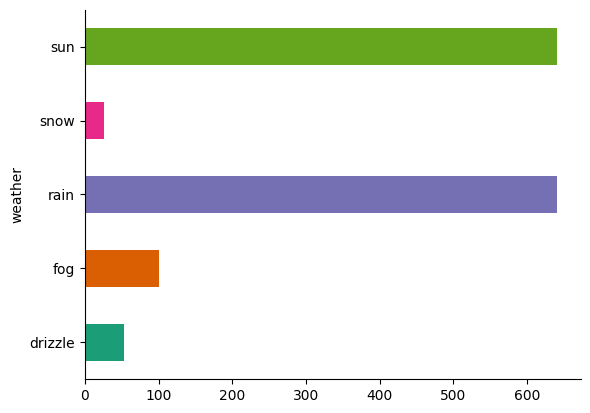

In [ ]:
# @title weather

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('weather').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-61-0cbd94ab326f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='wind', y='weather', inner='box', palette='Dark2')


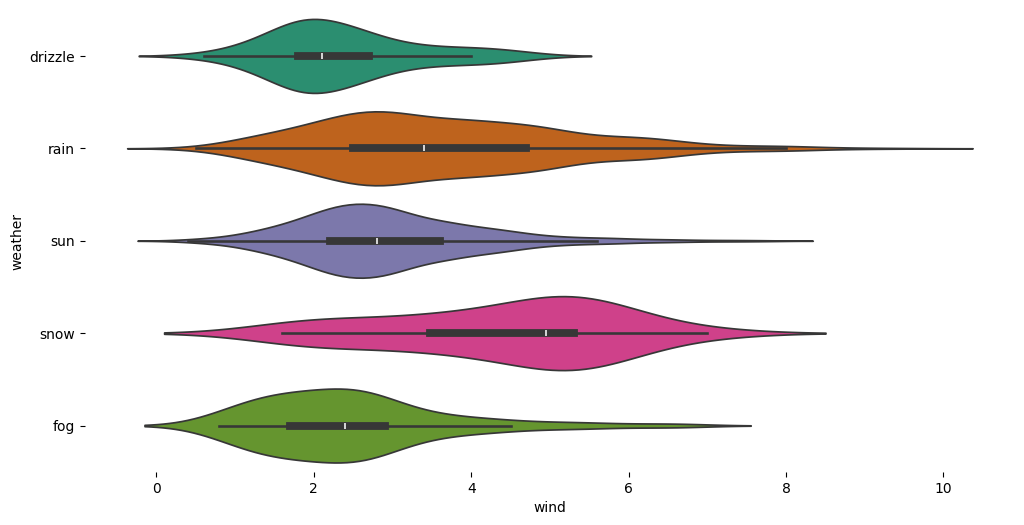

In [ ]:
# @title weather vs wind

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='wind', y='weather', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-62-66369b5c23d0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='precipitation', y='weather', inner='box', palette='Dark2')


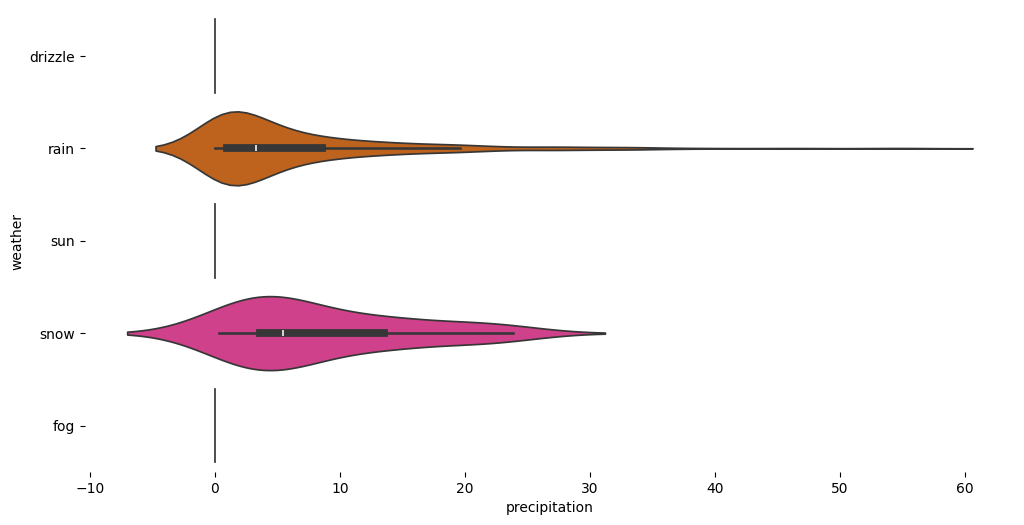

In [ ]:
# @title weather vs precipitation

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='precipitation', y='weather', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-55-6d4d43f2c061>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='temp_min', y='weather', inner='box', palette='Dark2')


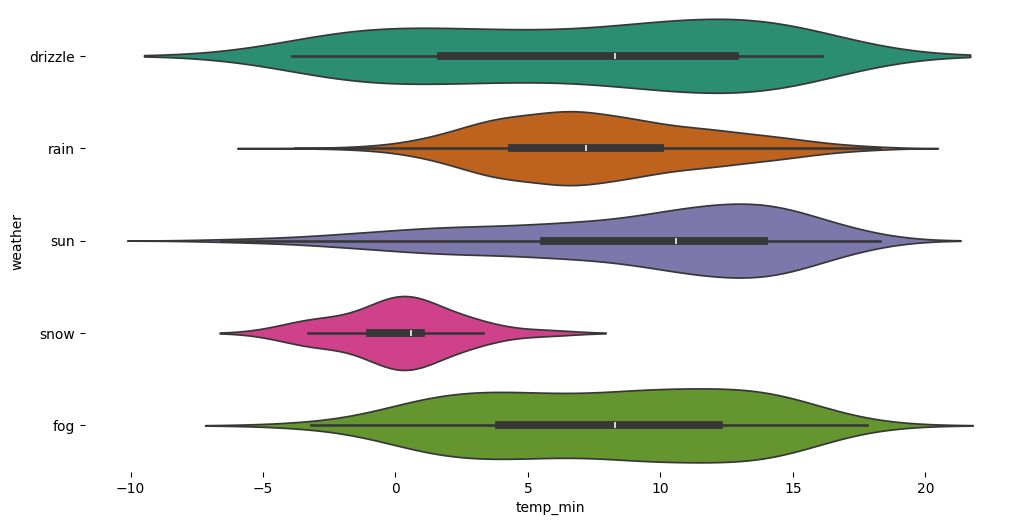

In [ ]:
# @title weather vs temp_min

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='temp_min', y='weather', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-63-981b66cad03d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='temp_max', y='weather', inner='box', palette='Dark2')


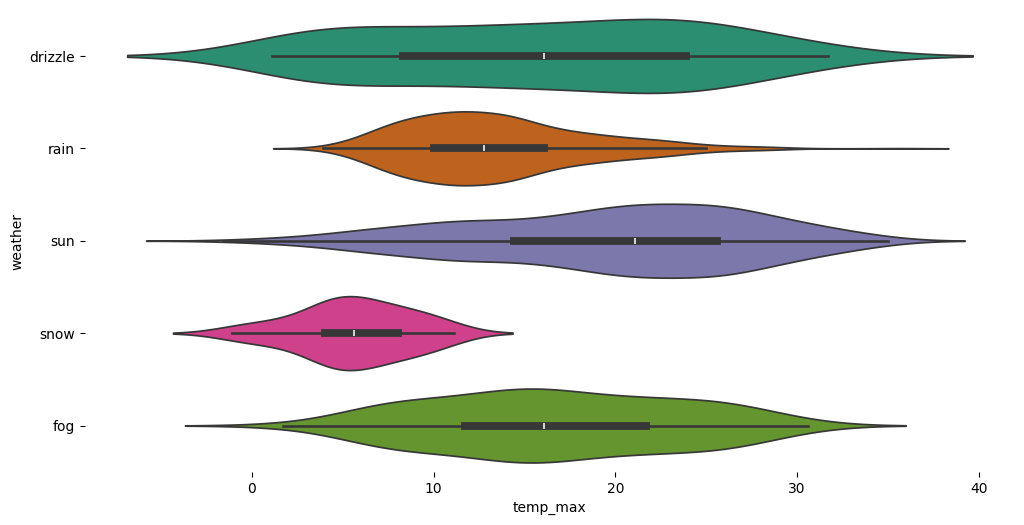

In [ ]:
# @title weather vs temp_max

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='temp_max', y='weather', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# @title Data Cleaning
X = df.drop(['weather','date'],axis=1)
y = df['weather']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_test)

      precipitation  temp_max  temp_min  wind
892             0.0      23.9      11.1   2.7
1105            5.8       7.8       6.1   0.5
413             0.0       9.4       4.4   3.4
522             0.0      26.7      12.2   2.5
1036            1.8      13.3       7.2   2.9
...             ...       ...       ...   ...
1361            0.0      20.6       8.3   1.8
802             0.5      13.9       5.0   2.5
651             0.0      15.0       6.7   1.8
722             1.5      11.7       6.1   5.9
254             0.0      20.0       8.9   4.2

[293 rows x 4 columns]


In [ ]:
print(y_test)

892      sun
1105    rain
413     rain
522      sun
1036    rain
        ... 
1361     sun
802     rain
651      fog
722     rain
254      sun
Name: weather, Length: 293, dtype: object


In [ ]:
# @title Naive Bayes Gaussian
from sklearn.naive_bayes import GaussianNB

In [ ]:
g = GaussianNB()
model = g.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = model.predict(X_test)
y_pred

array(['sun', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun',
       'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'rain', 'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'rain',
       'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain', 'sun',
       'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'snow',
       'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'rain', 'rain', 'sun', 'sun', 'rain', 'snow', 'sun', 'sun', 'rain',
       'sun', 'rain', 'sun', 'sun', 'rain', 'snow', 'rain', 'sun', 'sun',
       'rain', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'sun',
       'drizzle', 'sun', 'sun', 'sun', 'rain', 'rai

In [ ]:
mapping = {'sun':0,'rain':1,'drizzle':2,'fog':3,'snow':4}


In [ ]:
y_test = y_test.replace(mapping)
y_pred = pd.Series(y_pred).replace(mapping)
y_test

892     0
1105    1
413     1
522     0
1036    1
       ..
1361    0
802     1
651     3
722     1
254     0
Name: weather, Length: 293, dtype: int64

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.8293515358361775

In [ ]:
# @title Prior Probability Naive Bayes Gaussian
cls = GaussianNB(priors=[0.1,0.1,0.2,0.1,0.5])

In [ ]:
model = cls.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test = y_test.replace(mapping)
y_pred = pd.Series(y_pred).replace(mapping)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7986348122866894

In [ ]:
# @title Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
y_test_num = y_test.replace(mapping)
y_pred_rf_num = pd.Series(y_pred_rf).replace(mapping)
accuracy_rf = accuracy_score(y_test_num, y_pred_rf_num)
print(accuracy_rf)

0.8191126279863481


In [ ]:
# @title KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
y_pred_knn_num = pd.Series(y_pred_knn).replace(mapping)

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn_num)
print(accuracy_knn)

0.7781569965870307
